In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# Project feature functions
from src.features import (
    add_features,
    add_log_target,
    get_feature_columns,
    build_reviews_features,
    merge_reviews_features,
    build_calendar_features,
    merge_calendar_features
)


In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df  = pd.read_csv("../data/test.csv")

print("train:", train_df.shape)
print("test :", test_df.shape)

display(train_df.head(2))


train: (24153, 58)
test : (4750, 56)


,Unnamed: 0.1,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,0,25436,https://www.airbnb.com/rooms/25436,20250627144659,2025-06-28,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
1,1,1,34177,https://www.airbnb.com/rooms/34177,20250627144659,2025-07-01,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,...,4.88,4.81,4.69,4.81,NaN,f,5,5,0,0


In [3]:
reviews_df  = pd.read_csv("../data/reviews.csv")
calendar_df = pd.read_csv("../data/calendar.csv")

print("reviews :", reviews_df.shape)
print("calendar:", calendar_df.shape)

display(reviews_df.head(2))
display(calendar_df.head(2))


reviews : (516034, 2)
calendar: (10817505, 5)


,listing_id,date
0,34177,2015-12-29
1,34177,2016-01-19


,listing_id,date,available,minimum_nights,maximum_nights
0,25436,2025-06-28,f,100,160
1,25436,2025-06-29,f,100,160


In [4]:
# Use latest train scrape date as reference
ref_date = train_df["last_scraped"].max()

reviews_feat = build_reviews_features(reviews_df, ref_date)
cal_feat     = build_calendar_features(calendar_df)

print("reviews_feat:", reviews_feat.shape)
print("cal_feat    :", cal_feat.shape)

display(reviews_feat.head())
display(cal_feat.head())


reviews_feat: (18290, 4)
cal_feat    : (29637, 5)


,listing_id,review_count,last_review_date,days_since_last_review
0,34177,16,2024-01-03,546
1,73477,11,2024-01-13,536
2,77292,14,2024-08-11,325
3,88949,112,2024-01-05,544
4,101397,93,2024-07-06,361


,listing_id,cal_days,cal_avail_rate,cal_min_nights_mean,cal_max_nights_mean
0,25436,365,0.000000,100.0,160.0
1,34177,365,0.997260,100.0,365.0
2,42835,365,0.238356,100.0,730.0
3,73477,365,0.915068,100.0,1125.0
4,77292,365,0.953425,2.0,730.0


In [5]:
train_df = merge_reviews_features(train_df, reviews_feat)
test_df  = merge_reviews_features(test_df, reviews_feat)

train_df = merge_calendar_features(train_df, cal_feat)
test_df  = merge_calendar_features(test_df, cal_feat)

display(
    train_df[["review_count", "days_since_last_review", "cal_avail_rate"]].head()
)


,review_count,days_since_last_review,cal_avail_rate
0,NaN,NaN,0.000000
1,16.0,546.0,0.997260
2,NaN,NaN,0.238356
3,11.0,536.0,0.915068
4,14.0,325.0,0.953425


In [6]:
cat_cols = [
    "property_type",
    "room_type",
    "neighbourhood_cleansed",
    "host_response_time",
    "host_location",
    "neighbourhood",
]

for col in cat_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna("Unknown")
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("Unknown")

print("Categorical NaNs filled")


Categorical NaNs filled


In [7]:
train_df = add_features(train_df)
test_df  = add_features(test_df)

print("Feature engineering done")

display(train_df.head(2))


Feature engineering done


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,amenity_heating,amenity_washer,amenity_dryer,amenity_parking,amenity_tv,amenity_elevator,amenity_pool,last_scraped_dt,host_since_dt,host_tenure_days
0,25436,https://www.airbnb.com/rooms/25436,20250627144659,2025-06-28,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,1,1,1,0,0,0,0,2025-06-28,2010-04-09,5559.0
1,34177,https://www.airbnb.com/rooms/34177,20250627144659,2025-07-01,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,1,1,0,0,1,0,0,2025-07-01,NaT,NaN


In [8]:
train_df = add_log_target(train_df)

print("log_price exists:", "log_price" in train_df.columns)

display(train_df[["price", "price_num", "log_price"]].head())


log_price exists: True


,price,price_num,log_price
0,NaN,NaN,NaN
1,"1,794.00",1794.0,7.492760
2,NaN,NaN,NaN
3,"2,331.00",2331.0,7.754482
4,NaN,NaN,NaN


In [9]:
feature_cols = get_feature_columns(train_df)

print("Feature count:", len(feature_cols))
print(feature_cols)

display(
    train_df.isna().mean()
    .sort_values(ascending=False)
    .head(12)
)

display(train_df[feature_cols].describe().T)


Feature count: 21
['accommodates', 'bedrooms', 'beds', 'bathrooms_num', 'bathroom_shared_flag', 'minimum_nights', 'maximum_nights', 'latitude', 'longitude', 'amenities_count', 'host_response_rate_num', 'host_acceptance_rate_num', 'host_is_superhost_bin', 'instant_bookable_bin', 'host_identity_verified_bin', 'host_tenure_days', 'review_count', 'days_since_last_review', 'cal_avail_rate', 'cal_min_nights_mean', 'cal_max_nights_mean']


neighbourhood_group_cleansed    1.000000
host_neighbourhood              0.891980
bathroom_shared_flag            0.755476
neighborhood_overview           0.714114
host_about                      0.612636
license                         0.473523
review_scores_value             0.376930
review_scores_location          0.376889
review_scores_checkin           0.376889
review_scores_accuracy          0.376889
days_since_last_review          0.376806
last_review_date                0.376806
dtype: float64

,count,mean,std,min,25%,50%,75%,max
accommodates,24153.0,3.538981,2.177697,1.00000,2.000000,3.000000,4.000000,16.000000
bedrooms,23639.0,1.521384,1.643558,0.00000,1.000000,1.000000,2.000000,50.000000
beds,20871.0,2.095875,2.204290,0.00000,1.000000,2.000000,3.000000,54.000000
bathrooms_num,24049.0,1.218907,0.996549,0.00000,1.000000,1.000000,1.000000,50.000000
bathroom_shared_flag,5906.0,0.375720,0.484349,0.00000,0.000000,0.000000,1.000000,1.000000
minimum_nights,24153.0,58.221380,61.847969,1.00000,2.000000,100.000000,100.000000,999.000000
maximum_nights,24153.0,470.528878,310.405535,1.00000,365.000000,365.000000,365.000000,9999.000000
latitude,24153.0,41.029320,0.048364,40.81546,41.005032,41.031507,41.048843,41.486680
longitude,24153.0,28.972679,0.154331,28.00757,28.965280,28.980280,29.004379,29.870790
amenities_count,24153.0,28.512442,16.767473,0.00000,13.000000,28.000000,41.000000,106.000000


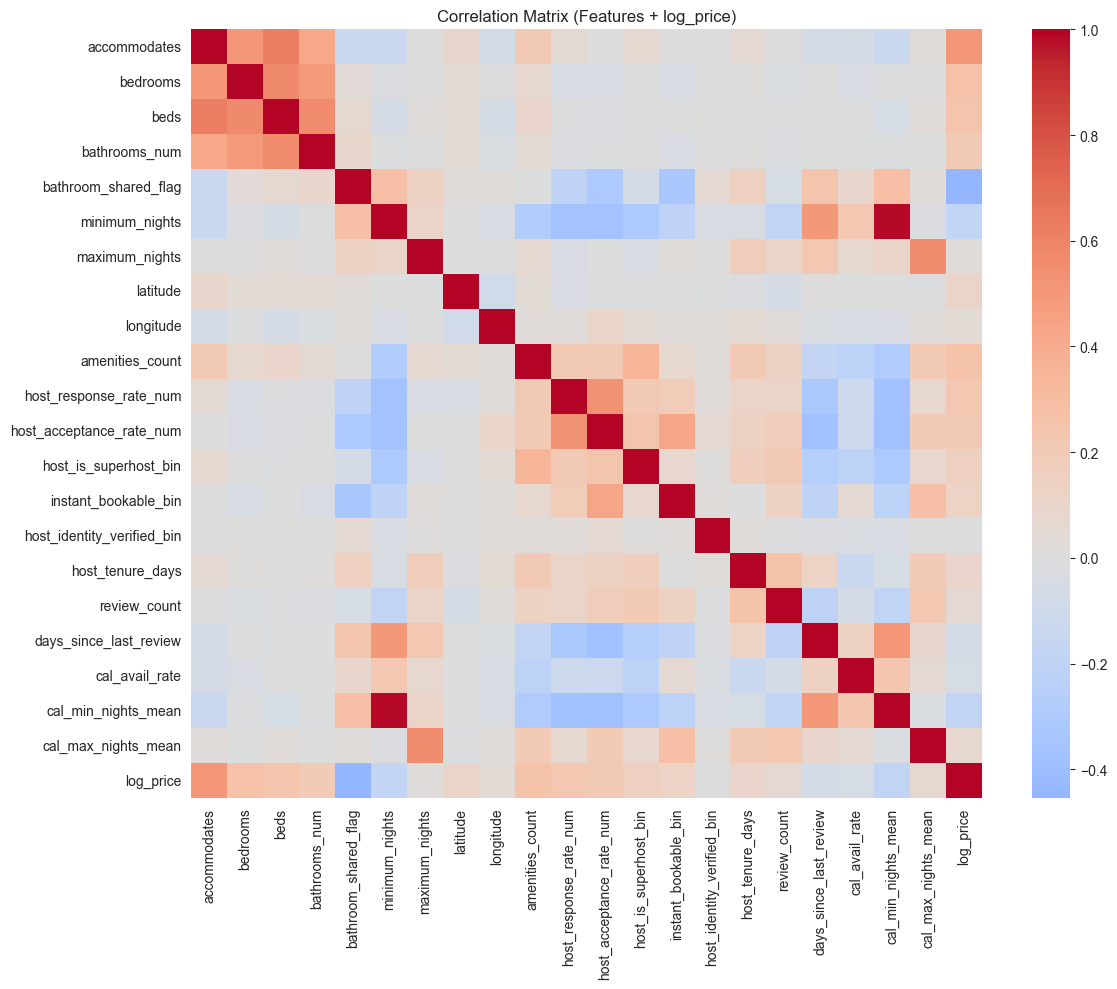

In [10]:
feat_cols = get_feature_columns(train_df)

corr_df = train_df.dropna(subset=["log_price"]).copy()
corr_cols = [
    c for c in feat_cols
    if c in corr_df.columns and pd.api.types.is_numeric_dtype(corr_df[c])
]
corr_cols = corr_cols + ["log_price"]

corr = corr_df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Features + log_price)")
plt.tight_layout()
plt.show()


In [11]:
corr_with_target = (
    corr["log_price"]
    .drop("log_price")
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

display(corr_with_target.head(20).to_frame("corr_with_log_price"))


,corr_with_log_price
accommodates,0.510517
bathroom_shared_flag,-0.454198
bedrooms,0.269513
amenities_count,0.260193
beds,0.252762
host_response_rate_num,0.227789
host_acceptance_rate_num,0.221076
bathrooms_num,0.203643
cal_min_nights_mean,-0.188883
minimum_nights,-0.181643


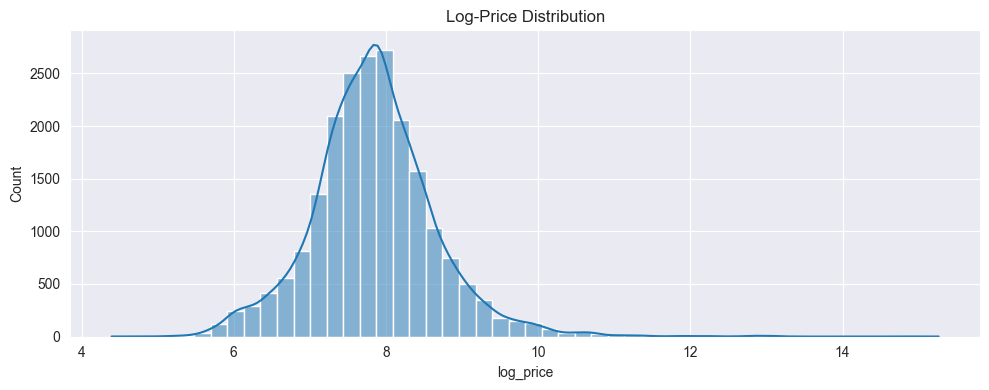

In [12]:
tmp = train_df.dropna(subset=["log_price"]).copy()

plt.figure(figsize=(10, 4))
sns.histplot(tmp["log_price"], bins=50, kde=True)
plt.title("Log-Price Distribution")
plt.xlabel("log_price")
plt.tight_layout()
plt.show()


In [13]:
feature_cols = get_feature_columns(train_df)

train_ml = train_df.dropna(subset=["log_price"]).copy()

X_train = train_ml[feature_cols].copy()
y_train = train_ml["log_price"].copy()
X_test  = test_df[feature_cols].copy()

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)

print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in X_test :", X_test.isna().sum().sum())

display(X_train.head(3))


X_train: (20804, 21)
y_train: (20804,)
X_test : (4750, 21)
NaNs in X_train: 45287
NaNs in X_test : 10611


,accommodates,bedrooms,beds,bathrooms_num,bathroom_shared_flag,minimum_nights,maximum_nights,latitude,longitude,amenities_count,...,host_acceptance_rate_num,host_is_superhost_bin,instant_bookable_bin,host_identity_verified_bin,host_tenure_days,review_count,days_since_last_review,cal_avail_rate,cal_min_nights_mean,cal_max_nights_mean
1,3,1.0,2.0,1.0,NaN,100,365,41.066810,29.040350,43,...,NaN,0.0,0,NaN,NaN,16.0,546.0,0.997260,100.0,365.0
3,2,1.0,2.0,1.0,NaN,100,360,41.034447,28.987555,34,...,1.00,1.0,0,1.0,5256.0,11.0,536.0,0.915068,100.0,1125.0
5,4,2.0,2.0,1.5,NaN,100,1125,41.033190,28.980710,39,...,0.91,0.0,0,1.0,5198.0,112.0,544.0,1.000000,100.0,1125.0


In [19]:
# Columns that must NEVER go into a model
drop_cols = [
    "price",                 # raw target
    "price_num",             # derived target
    "log_price",             # target
    "neighbourhood_group_cleansed"  # all NaN
]

X_train_full = train_ml.drop(columns=[c for c in drop_cols if c in train_ml.columns])
X_test_full  = test_df.drop(columns=[c for c in drop_cols if c in test_df.columns])

print("Dropped:", drop_cols)
print("price_num in train:", "price_num" in X_train_full.columns)
print("price_num in test :", "price_num" in X_test_full.columns)


Dropped: ['price', 'price_num', 'log_price', 'neighbourhood_group_cleansed']
price_num in train: False
price_num in test : False
